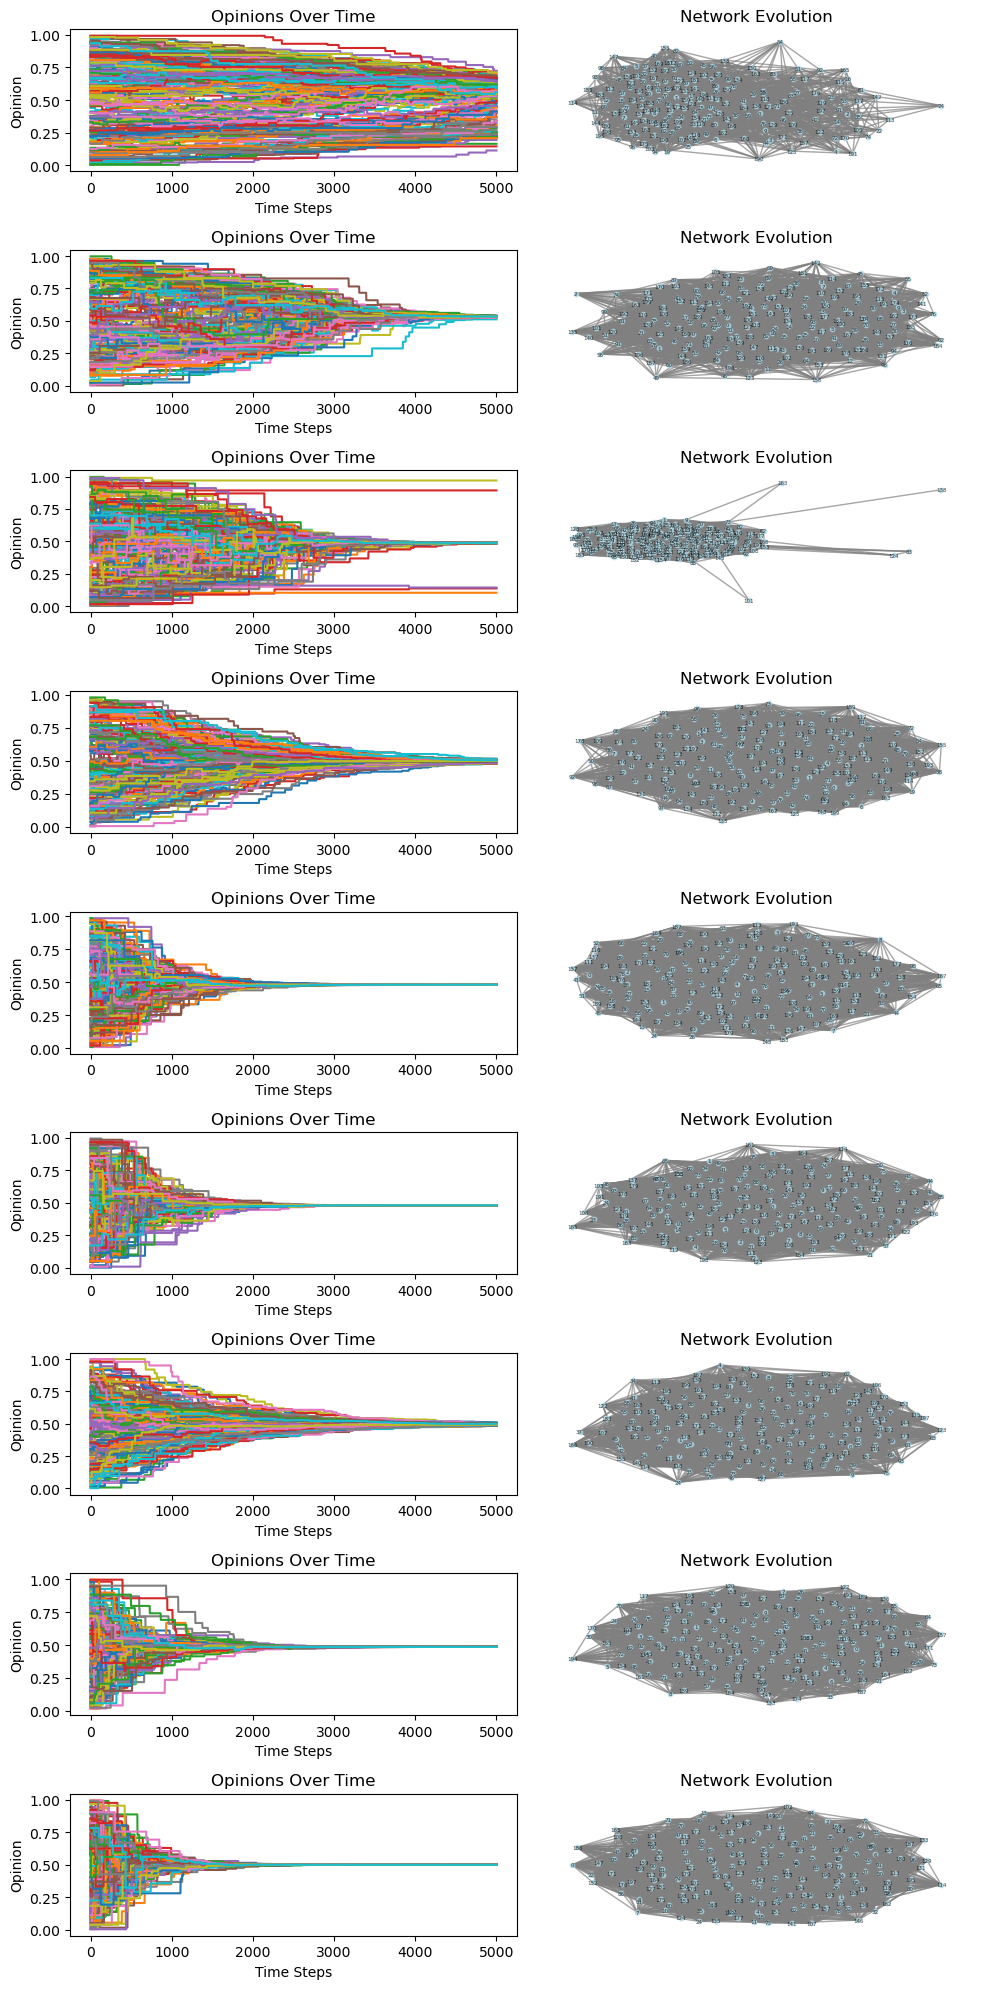

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

def initialize_opinions(num_agents):
    return np.random.rand(num_agents)

def create_network(num_agents):
    G = nx.Graph()
    G.add_nodes_from(range(num_agents))

    return G

def update_opinions(G, opinions, similarity_threshold, delta):
    num_agents = len(opinions)
    agent1, agent2 = np.random.choice(num_agents, size=2, replace=False)

    if abs(opinions[agent1] - opinions[agent2]) <= similarity_threshold:
        opinions[agent1] += delta * (opinions[agent2] - opinions[agent1])
        opinions[agent2] += delta * (opinions[agent1] - opinions[agent2])
        G.add_edge(agent1, agent2)

    return opinions

def simulate_opinion_dynamics(num_agents, num_steps, similarity_threshold, delta):
    opinions = initialize_opinions(num_agents)
    opinion_history = [opinions.copy()]
    G = create_network(num_agents)

    for step in range(num_steps):
        opinions = update_opinions(G, opinions, similarity_threshold, delta)
        opinion_history.append(opinions.copy())

    return opinion_history, G

def plot_opinion_evolution(ax, opinion_history):
    num_steps = len(opinion_history) - 1
    num_agents = len(opinion_history[0])

    for agent in range(num_agents):
        agent_opinions = [history[agent] for history in opinion_history]
        ax.plot(range(num_steps + 1), agent_opinions, label=f'Agent {agent + 1}')

    ax.set_title('Opinions Over Time')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Opinion')

def plot_network_evolution(ax, G):
    pos = nx.spring_layout(G) 
    nx.draw(G, pos, with_labels=True, node_size=10, font_size=4, ax=ax,
            node_color='lightblue', edge_color='gray', alpha=0.7)
    ax.set_title('Network Evolution')

fig, axs = plt.subplots(9, 2, figsize=(10, 20))

parameters_list = []

for i, similarity_threshold in enumerate([0.3, 0.5, 0.7]):
    for j, delta in enumerate([0.1, 0.3, 0.5]):
        num_agents = 200
        num_steps = 5000

        opinion_history, network = simulate_opinion_dynamics(num_agents, num_steps, similarity_threshold, delta)

        plot_opinion_evolution(axs[i * 3 + j, 0], opinion_history)
        plot_network_evolution(axs[i * 3 + j, 1], network)

        parameters = {
            'Similarity Threshold': similarity_threshold,
            'Delta': delta,
            'Nodes': network.number_of_nodes(),
            'Edges': network.number_of_edges(),
            'Average Degree': np.mean(list(dict(network.degree()).values())),
            'Clustering Coefficient': nx.average_clustering(network),
            'Average Shortest Path Length': nx.average_shortest_path_length(network)
        }

        parameters_list.append(parameters)

parameters_df = pd.DataFrame(parameters_list)

plt.tight_layout()
plt.savefig('op_ev_n.png')
plt.show()

In [24]:
parameters_df

,Similarity Threshold,Delta,Nodes,Edges,Average Degree,Clustering Coefficient,Average Shortest Path Length
0,0.3,0.1,200,2799,27.99,0.182517,1.973166
1,0.3,0.3,200,3587,35.87,0.187871,1.822663
2,0.3,0.5,200,3630,36.30,0.193814,1.849698
3,0.5,0.1,200,4297,42.97,0.216734,1.784121
4,0.5,0.3,200,4364,43.64,0.220471,1.780704
5,0.5,0.5,200,4381,43.81,0.221286,1.779899
6,0.7,0.1,200,4407,44.07,0.221666,1.778543
7,0.7,0.3,200,4415,44.15,0.220402,1.778141
8,0.7,0.5,200,4421,44.21,0.219547,1.777990
